In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from PIL import Image
import os
import os.path
import glob
import argparse

In [2]:
np.set_printoptions(suppress=True)

In [3]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
# (8,6) is for the given testing images.
# If you use the another data (e.g. pictures you take by your smartphone), 
# you need to set the corresponding numbers.
corner_x = 8
corner_y = 7
objp = np.zeros((corner_x*corner_y,3), np.float32)
objp[:,:2] = np.mgrid[0:corner_x, 0:corner_y].T.reshape(-1,2)
block_len = 2.5
objp = objp * block_len

Start finding chessboard corners of RGB image...
find the chessboard corners of camera_calibration_data\00.png
find the chessboard corners of camera_calibration_data\01.png
find the chessboard corners of camera_calibration_data\02.png
find the chessboard corners of camera_calibration_data\03.png
find the chessboard corners of camera_calibration_data\04.png
find the chessboard corners of camera_calibration_data\05.png
find the chessboard corners of camera_calibration_data\06.png
find the chessboard corners of camera_calibration_data\07.png
find the chessboard corners of camera_calibration_data\08.png
find the chessboard corners of camera_calibration_data\09.png
find the chessboard corners of camera_calibration_data\10.png
find the chessboard corners of camera_calibration_data\11.png
find the chessboard corners of camera_calibration_data\12.png
find the chessboard corners of camera_calibration_data\14.png
find the chessboard corners of camera_calibration_data\15.png
find the chessboard c

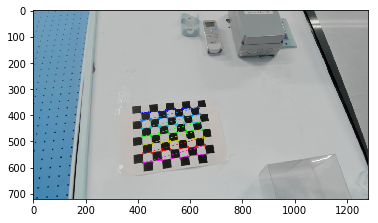

In [4]:
RGBobjpoints = []
RGBimgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_calibration_data/*g')

# Step through the list and search for chessboard corners
print('Start finding chessboard corners of RGB image...')
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray)
    img_size = (img.shape[1], img.shape[0])

    #Find the chessboard corners
    print('find the chessboard corners of',fname)
    ret, corners = cv2.findChessboardCorners(gray, (corner_x,corner_y), None)
    
    #criteria:角點精準化迭代過程的終止條件
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    #執行亞畫素級角點檢測
    corners = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
    
#     print(len(corners))

    # If found, add object points, image points
    if ret == True:
        RGBobjpoints.append(objp)
        RGBimgpoints.append(corners)
#         print(fname)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (corner_x,corner_y), corners, ret)
        plt.imshow(img)
    else:
        print(fname)

In [5]:
print('Camera calibration by recorded RGB image...')
# You need to comment these functions and write your calibration function from scratch.
# Notice that rvecs is rotation vector, not the rotation matrix, and tvecs is translation vector.
# In practice, you'll derive extrinsics matrixes directly. The shape must be [pts_num,3,4], and use them to plot.
print(len(RGBobjpoints), len(RGBimgpoints))
print(RGBobjpoints[0].shape, RGBimgpoints[0].shape)
print(img_size)
ret, RGB_mtx, RGB_dist, RGB_rvecs, RGB_tvecs = cv2.calibrateCamera(RGBobjpoints, RGBimgpoints, img_size,None,None)
RGB_Vr = np.array(RGB_rvecs)
RGB_Tr = np.array(RGB_tvecs)
RGB_extrinsics = np.concatenate((RGB_Vr, RGB_Tr), axis=1).reshape(-1,6)
print(ret)
print(RGB_mtx)
print(RGB_dist)
print()
print(RGB_extrinsics)
print(RGB_Tr)

Camera calibration by recorded RGB image...
28 28
(56, 3) (56, 1, 2)
(1280, 720)
0.22927307607079953
[[920.41554065   0.         640.42506415]
 [  0.         919.25718514 359.86335889]
 [  0.           0.           1.        ]]
[[ 0.21651283 -0.6450563  -0.00425079 -0.00337746  0.56010408]]

[[ -0.09953153  -0.39280099  -0.13439934  -0.29286082  -6.47388527
   49.91975888]
 [  0.22000693  -0.02056683   0.00343355   3.02788163  -8.51397089
   46.51989443]
 [  0.09812244   0.24088454  -0.03758955  -3.36532781 -17.69189145
   64.02392591]
 [ -0.18649637  -0.0029611    0.04131581  -6.55987793  -8.74954323
   64.51244442]
 [ -0.12121804  -0.23331249  -0.03622501 -10.79370011 -12.00697627
   58.86290844]
 [  0.38089939  -0.26802695  -0.17178604  -6.18512566  -5.2341653
   38.24145493]
 [  0.18078552   0.47038283  -0.03264569   3.77479192  -7.70428409
   49.24229368]
 [  0.14560075  -0.20318209  -0.02422476  -6.40160573 -17.96181526
   64.66631438]
 [  0.01830653  -0.10868921   0.0462406    2

In [ ]:
# 0212
# 0.22927307607079953
# [[920.41554065   0.         640.42506415]
#  [  0.         919.25718514 359.86335889]
#  [  0.           0.           1.        ]]
# [[ 0.21651283 -0.6450563  -0.00425079 -0.00337746  0.56010408]]

In [6]:
#0210 
#0.8744209650661895
# [[941.09129171   0.         638.94641198]
#  [  0.         939.71879681 364.60682026]
#  [  0.           0.           1.        ]]
# [[ 0.32649104 -1.06727582 -0.0025263  -0.00531191  1.09671098]]